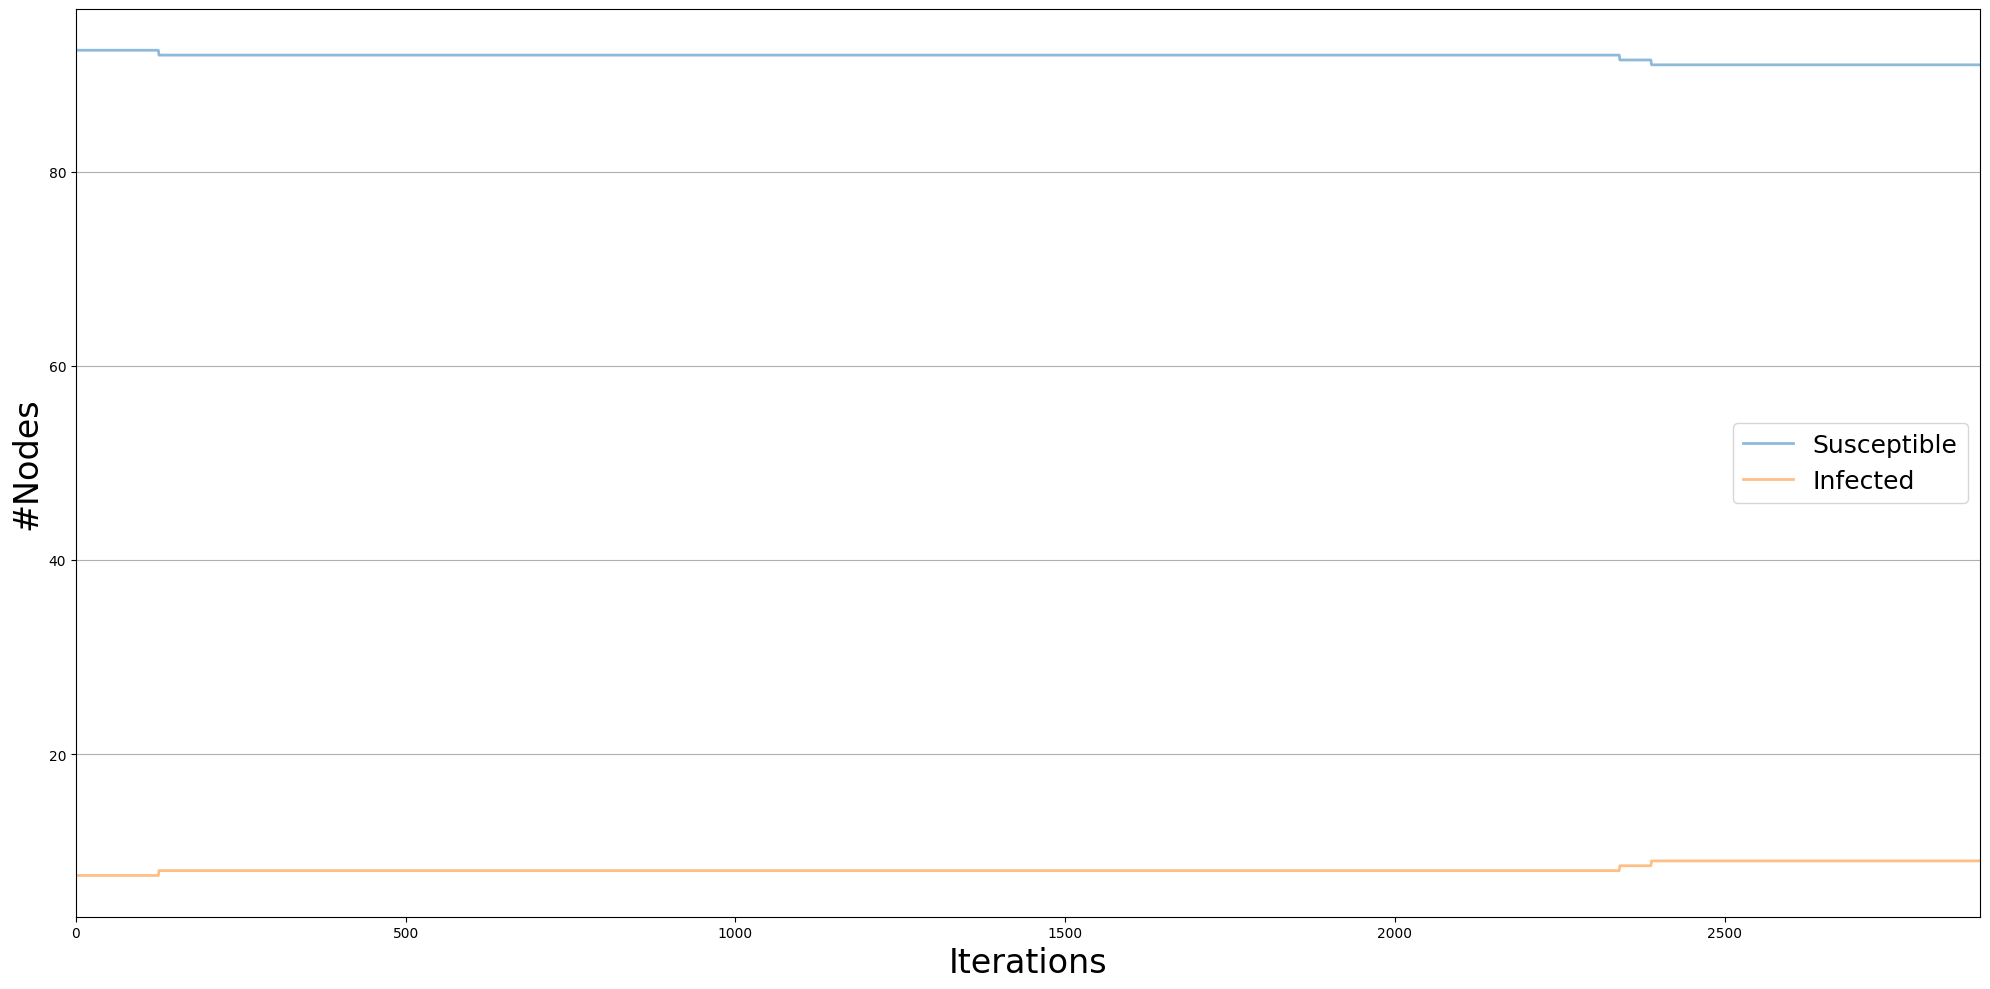

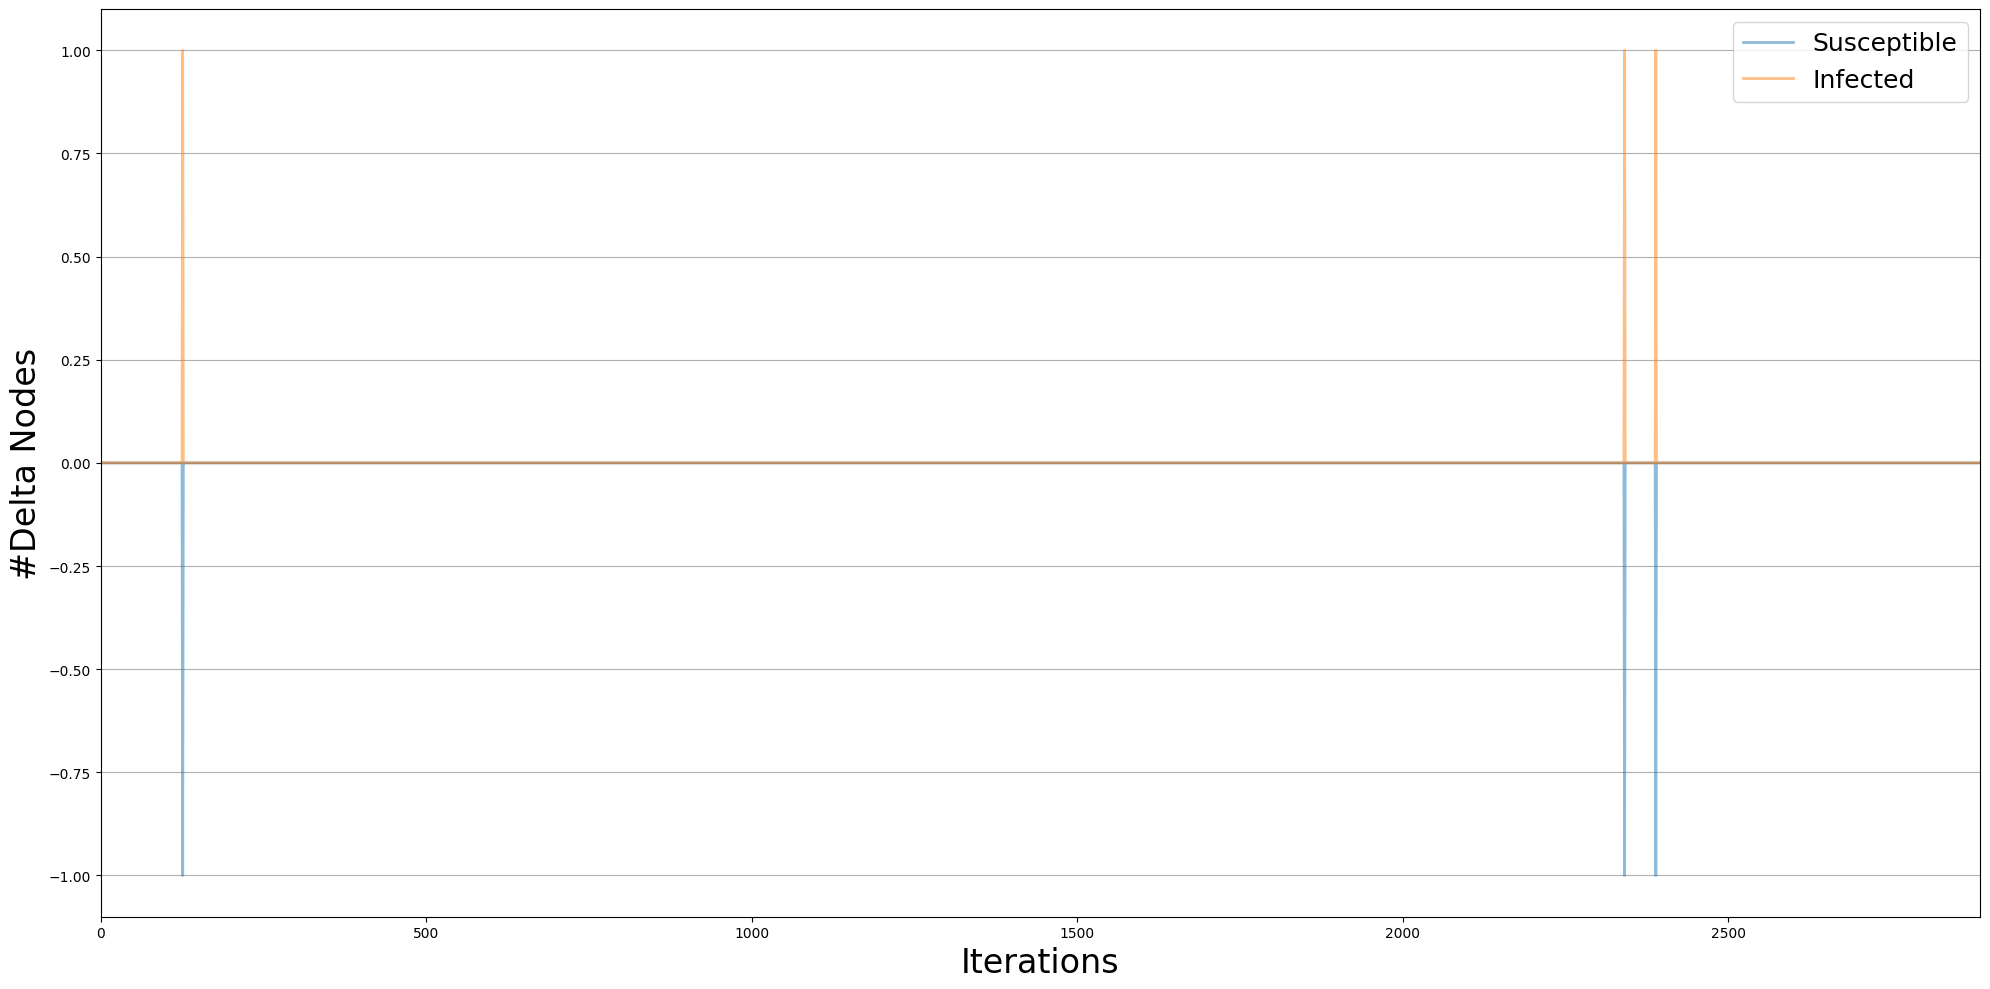

In [10]:
'''
Il modello SI (Susceptible-Infected) è un modello di diffusione di malattie in cui ogni individuo in una popolazione è in uno di due stati: Suscettibile 
(S) o Infetto (I). Gli individui suscettibili possono diventare infetti quando entrano in contatto con individui infetti. Una volta infetti, rimangono in 
tale stato per il resto della simulazione. Questo modello è implementato in NDlib come dm.DynSIModel.  

DynGraph() è un tipo di grafo fornito dalla  libreria Dynetx che può cambiare nel tempo. Puoi aggiungere o rimuovere nodi e archi in momenti diversi, il 
che lo rende utile per modellare reti che nel tempo. 
 
Nel tuo codice, stai creando un DynGraph() e poi aggiungendo interazioni da un grafo Erdős-Rényi  generato in ogni timestep. Un grafo Erdős-Rényi è un 
tipo di grafo casuale in cui ogni coppia di nodi è connessa con una certa probabilità. In questo caso, stai generando un grafo  Erdős-Rényi con 200 nodi  
una probabilità del 5% che ogni coppia di nodi sia connessa.  

La differenza principale tra un DynGraph() e un grafo Erdős-Rényi è che il DynGraph() può cambiare nel tempo, mentre un grafo Erdős-Rényi ha una struttura
fissa una volta creato. Inoltre, un DynGraph() può contenere interazioni da diversi grafi Erdős-Rényi a diversi momenti, come nel tuo codice.  
 
Nel contesto del modello SI, l'uso di un DynGraph() permette di modellare come la diffusione della malattia cambia nel tempo man mano che la struttura 
della rete cambia. Ad esempio, potresti avere una rete sociale in cui le connessioni tra le persone cambiano nel tempo, e vorresti vedere come queste 
modifiche influenzano la diffusione di una malattia.
'''

import networkx as nx
import dynetx as dn
import ndlib.models.ModelConfig as mc
import ndlib.models.dynamic as dm
from past.builtins import xrange
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence


# Dynamic Network topology
dg = dn.DynGraph()

for t in xrange(0, 3):
    g = nx.erdos_renyi_graph(200, 0.05)
    dg.add_interactions_from(g.edges(), t)

# Model selection
model = dm.DynSIModel(dg)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)
config.add_model_parameter("fraction_infected", 0.1)
model.set_initial_status(config)

# Simulate snapshot based execution
iterations = model.execute_snapshots()

# Simulation interaction graph based execution
iterations = model.execute_iterations()
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()